In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
ratings=pd.read_csv("../datasets/ratings.csv")

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [4]:
ratings.userId.describe()

count    2.602429e+07
mean     1.350371e+05
std      7.817620e+04
min      1.000000e+00
25%      6.716400e+04
50%      1.351630e+05
75%      2.026930e+05
max      2.708960e+05
Name: userId, dtype: float64

In [5]:
ratings['timestamp']=pd.to_datetime(ratings['timestamp'],unit='s')

In [6]:
ratings=ratings[(ratings['userId']<1000)]

In [7]:
ratings.shape

(98923, 4)

In [8]:
links=pd.read_csv("../datasets/links.csv")

In [9]:
links.shape

(45843, 3)

In [10]:
movies_metadata=pd.read_csv("../datasets/movies_metadata.csv")

/var/folders/8p/44mq6_9n6sl5sg2z924w6wkm0000gq/T/ipykernel_87026/2176761819.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata=pd.read_csv("../datasets/movies_metadata.csv")


In [11]:
movies_metadata=movies_metadata[movies_metadata['id'].apply(lambda x:x not in ("1997-08-20","2012-09-29","2014-01-01"))]
movies_metadata['id']=movies_metadata.id.astype(int)

In [12]:
links=pd.merge(links,movies_metadata[['id','title']],left_on="tmdbId",right_on="id",how="inner")

In [13]:
links.head()

,movieId,imdbId,tmdbId,id,title
0,1,114709,862.0,862,Toy Story
1,2,113497,8844.0,8844,Jumanji
2,3,113228,15602.0,15602,Grumpier Old Men
3,4,114885,31357.0,31357,Waiting to Exhale
4,5,113041,11862.0,11862,Father of the Bride Part II


In [14]:
links.isna().sum()

movieId    0
imdbId     0
tmdbId     0
id         0
title      3
dtype: int64

In [15]:
ratings=pd.merge(ratings,links[['movieId','title']],left_on="movieId",right_on="movieId",how="inner")

In [16]:
ratings.shape

(98778, 5)

In [17]:
ratings.head()

,userId,movieId,rating,timestamp,title
0,1,110,1.0,2015-03-09 22:52:09,Braveheart
1,11,110,3.5,2009-01-11 12:29:49,Braveheart
2,22,110,5.0,2005-03-27 15:23:29,Braveheart
3,24,110,5.0,2001-01-19 02:06:52,Braveheart
4,29,110,3.0,2003-01-31 13:33:25,Braveheart


In [18]:
ratings.dropna(how="any",inplace=True)
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
dtype: int64

In [19]:
#mean rating of all movies
ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Winter Light         5.0
Regular Lovers       5.0
La Belle Noiseuse    5.0
The Adjuster         5.0
Invasion U.S.A.      5.0
Name: rating, dtype: float64

In [20]:
#number of ratings count
ratings_count=pd.DataFrame(ratings.groupby('title')['rating'].mean())
ratings_count['num_ratings']=pd.DataFrame(ratings.groupby('title')['rating'].count())
ratings_count.sort_values('num_ratings',ascending=False).head(10)

,rating,num_ratings
title,,
The Shawshank Redemption,4.387640,356
Forrest Gump,4.011834,338
Pulp Fiction,4.261976,334
The Silence of the Lambs,4.178233,317
The Matrix,4.226384,307
Star Wars,4.146179,301
Jurassic Park,3.628866,291
Toy Story,3.907666,287
Terminator 2: Judgment Day,3.861538,260


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline


<AxesSubplot: >

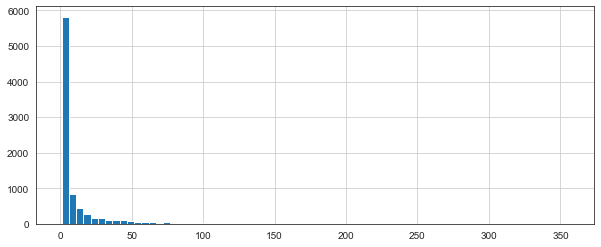

In [22]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

ratings_count['num_ratings'].hist(bins = 70)


<AxesSubplot: >

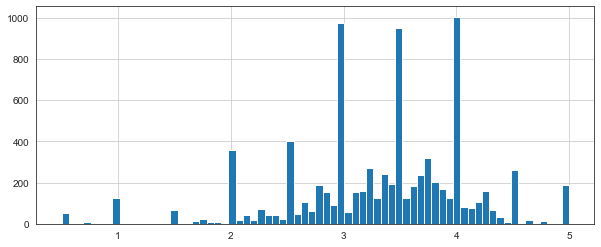

In [23]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))

ratings_count['rating'].hist(bins = 70)

In [24]:
# Sorting values according to
# the 'num_rating column'
movie_matrix = ratings.pivot_table(index ='userId',columns ='title', values ='rating')

movie_matrix.head()

title,"'night, Mother",(500) Days of Summer,...All the Marbles,...And God Created Woman,...And Justice for All,1-900,10,10 Cloverfield Lane,10 Items or Less,10 Things I Hate About You,...,eXistenZ,iBoy,xXx,xXx: Return of Xander Cage,xXx: State of the Union,¡Three Amigos!,À nos amours,Æon Flux,Želary,’Round Midnight
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
movie_matrix=movie_matrix.dropna(thresh=10,axis=1).fillna(0)

In [26]:
movie_matrix

title,(500) Days of Summer,10 Things I Hate About You,"10,000 BC",101 Dalmatians,12 Angry Men,12 Years a Slave,127 Hours,13 Going on 30,1408,15 Minutes,...,Zero Dark Thirty,Zodiac,Zombieland,Zoolander,Zootopia,[REC],eXistenZ,xXx,¡Three Amigos!,Æon Flux
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
movie_similarity_df=movie_matrix.corr(method='pearson')
movie_similarity_df.head()


title,(500) Days of Summer,10 Things I Hate About You,"10,000 BC",101 Dalmatians,12 Angry Men,12 Years a Slave,127 Hours,13 Going on 30,1408,15 Minutes,...,Zero Dark Thirty,Zodiac,Zombieland,Zoolander,Zootopia,[REC],eXistenZ,xXx,¡Three Amigos!,Æon Flux
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,1.000000,0.193760,0.217616,0.120373,0.018655,0.240659,0.342254,0.161189,0.092697,0.013324,...,0.285562,0.195176,0.392658,0.222585,0.190141,0.065441,-0.007490,0.061883,-0.003736,0.072105
10 Things I Hate About You,0.193760,1.000000,0.203229,0.197724,0.068075,0.109114,0.116220,0.291768,0.043558,0.083743,...,0.058427,0.062128,0.106470,0.261959,0.099400,0.042848,0.159436,0.234623,0.187461,0.094394
"10,000 BC",0.217616,0.203229,1.000000,0.219237,0.054780,0.255037,0.164574,0.092062,0.244281,0.064584,...,0.081705,0.210680,0.322360,0.156941,0.123351,0.264445,0.024258,0.295919,0.051391,0.203606
101 Dalmatians,0.120373,0.197724,0.219237,1.000000,0.072101,0.138335,0.044790,0.222371,0.105920,-0.018039,...,0.012549,0.114872,0.117648,0.170248,0.053865,0.036222,0.077204,0.145379,0.131904,0.140516
12 Angry Men,0.018655,0.068075,0.054780,0.072101,1.000000,0.172723,0.091324,0.169342,0.082054,0.019224,...,0.154709,0.213025,0.052633,0.082858,0.097351,0.014404,0.101625,0.134057,0.093529,0.071731


In [30]:
print(movie_matrix.columns)

Index(['(500) Days of Summer', '10 Things I Hate About You', '10,000 BC',
       '101 Dalmatians', '12 Angry Men', '12 Years a Slave', '127 Hours',
       '13 Going on 30', '1408', '15 Minutes',
       ...
       'Zero Dark Thirty', 'Zodiac', 'Zombieland', 'Zoolander', 'Zootopia',
       '[REC]', 'eXistenZ', 'xXx', '¡Three Amigos!', 'Æon Flux'],
      dtype='object', name='title', length=2129)


In [28]:
def get_similar_movies(movie_name,user_rating):
    similar_score=movie_similarity_df[movie_name]*(user_rating-2.5)
    similar_score=similar_score.sort_values(ascending=False)
    return similar_score

In [31]:
action_lover=[('xXx',5),('Zero Dark Thirty',3.5),('Zootopia',2),('12 Angry Men',2.5)]
similar_movies=pd.DataFrame()
for movie,rating in action_lover:
    similar_movies=similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)

similar_movies.head()
similar_movies.sum().sort_values(ascending=False)

/var/folders/8p/44mq6_9n6sl5sg2z924w6wkm0000gq/T/ipykernel_87026/3644200965.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies=similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
/var/folders/8p/44mq6_9n6sl5sg2z924w6wkm0000gq/T/ipykernel_87026/3644200965.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies=similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
/var/folders/8p/44mq6_9n6sl5sg2z924w6wkm0000gq/T/ipykernel_87026/3644200965.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies=similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
/var/folders/8p/44mq6_9n6sl5sg2z924w6wkm0000gq/T/ipykernel_87026/3644200965.py:4: 

title
xXx                                   2.483681
Men in Black II                       1.244749
Die Another Day                       1.224987
Pearl Harbor                          1.181222
Jumper                                1.178805
                                        ...   
Boxing Helena                        -0.081775
Disclosure                           -0.091458
Zootopia                             -0.150778
Batman v Superman: Dawn of Justice   -0.168453
Logan                                -0.239001
Length: 2129, dtype: float64